In [6]:
%matplotlib inline
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset,DataLoader
import torchvision
from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
import d2lzh_pytorch.d2lzh_pytorch as d2l 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# 常用的图像增广方式

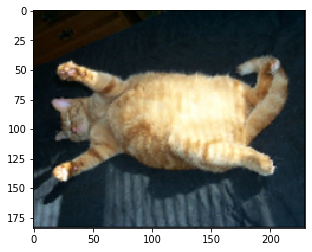

In [7]:
img = Image.open('data/cat1.jpg')
plt.imshow(img)

In [15]:
def show_images(imgs, num_rows, num_cols, scales=2):
    figsize = (num_cols * scales, num_rows * scales)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [13]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y =  [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

# 翻转和裁剪

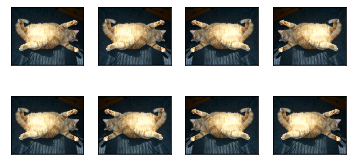

In [16]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

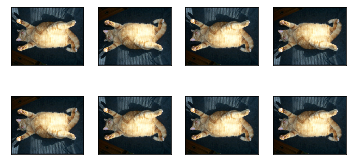

In [17]:
apply(img, torchvision.transforms.RandomVerticalFlip())

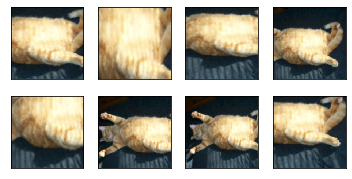

In [19]:
# 裁切
shape_aug = torchvision.transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

# 变化颜色

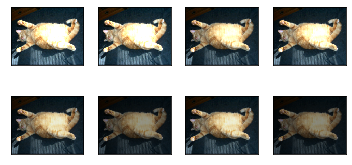

In [20]:
#亮度
apply(img, torchvision.transforms.ColorJitter(brightness=0.5))

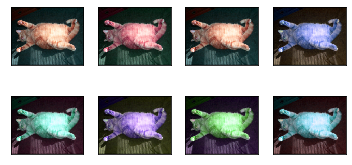

In [21]:
# 色调
apply(img, torchvision.transforms.ColorJitter(hue=0.5))

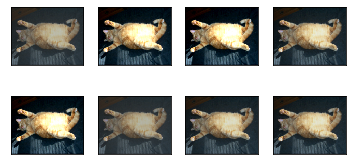

In [22]:
#对比度
apply(img, torchvision.transforms.ColorJitter(contrast=0.5))

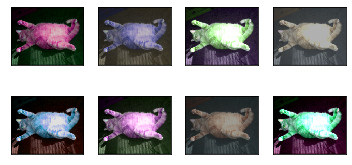

In [23]:
#同时设置
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5
)

apply(img, color_aug)

# 使用图像增广训练模型


In [ ]:
all_imges = torchvision.datasets.CIFAR10(train=True, root='~Datasets/CIFAR', download=True)